https://data.mendeley.com/datasets/wj9rwkp9c2/1  Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1, doi: 10.17632/wj9rwkp9c2.1

A diabetes dataset was created using data collected from the Iraqi population. The information was obtained from patient records at the laboratory of Medical City Hospital and the Specialized Center for Endocrinology and Diabetes at Al-Kindy Teaching Hospital. The patient files were reviewed, and relevant data were extracted and entered into a database to form the diabetes dataset. This dataset includes both medical information and laboratory test results. The initial data entered into the system includes the following attributes: patient number, blood sugar level, age, gender, creatinine ratio (Cr), body mass index (BMI), urea, cholesterol levels, fasting lipid profile (including total cholesterol, LDL, VLDL, triglycerides (TG), and HDL cholesterol), HBA1C, and the patient's diabetes classification (either Diabetic, Non-Diabetic, or Pre-Diabetic).

In [1]:
!wget https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded

--2024-10-20 16:32:18--  https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd [following]
--2024-10-20 16:32:19--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.70.144, 52.218.56.136, 52.218.97.248, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.70.144|:443..

In [2]:
!pip install shap

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/file_downloaded')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df['ID'].nunique()

800

In [7]:
df['CLASS'].nunique()

5

In [8]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


Dataset indicates 3 classes. Value_counts shows 5

In [9]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

To remove the spaces in front of Y and N

In [10]:
df['CLASS'] = df['CLASS'].str.replace(' ', '')
df['CLASS'].value_counts()

,count
CLASS,
Y,844
N,103
P,53


<Axes: xlabel='CLASS', ylabel='count'>

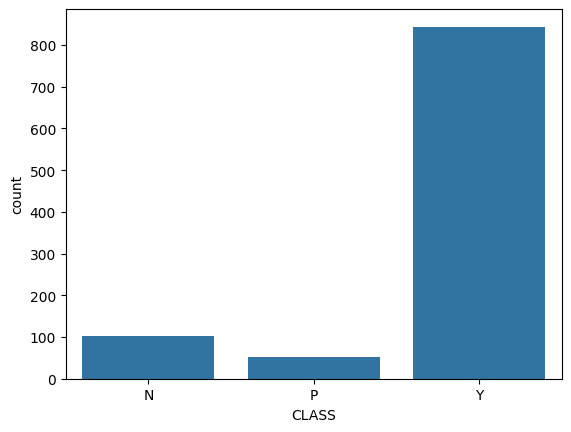

In [11]:
sns.countplot(x='CLASS', data=df)

In [12]:
df['Gender'].nunique()

3

In [13]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [14]:
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

,count
Gender,
M,565
F,435


In [15]:
#descriptive statistics like mean, standard deviation, for numerical features.
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


<Axes: xlabel='Gender', ylabel='count'>

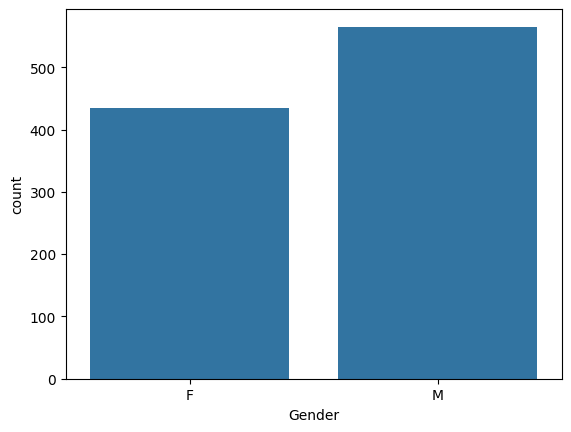

In [16]:
sns.countplot(x='Gender', data=df)

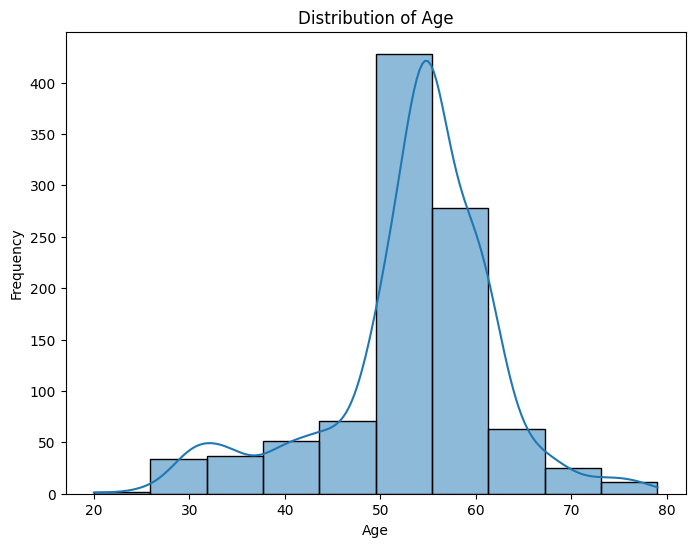

In [17]:
# Histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

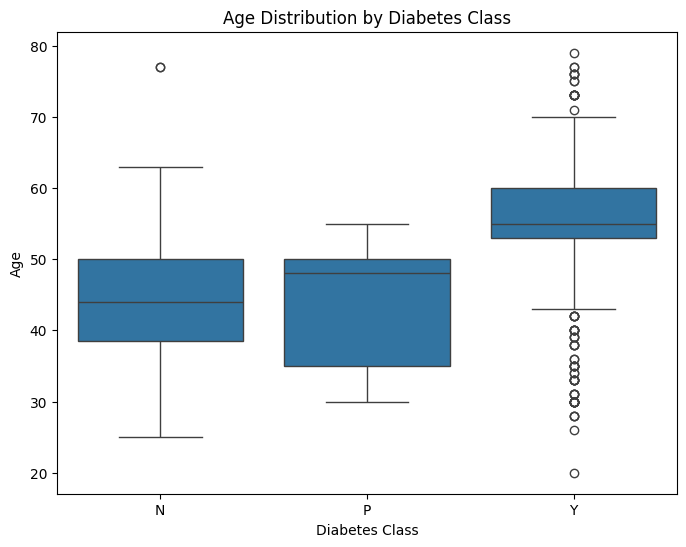

In [18]:
# Box plot of age by class
plt.figure(figsize=(8, 6))
sns.boxplot(x='CLASS', y='AGE', data=df)
plt.title('Age Distribution by Diabetes Class')
plt.xlabel('Diabetes Class')
plt.ylabel('Age')
plt.show()

In [19]:
# Count plot of age ranges by class
# Create age range categories
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age range boundaries
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']  # Define age range labels
df['age_range'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)  # Create 'age_range' column

In [20]:
df['age_range'].value_counts()

,count
age_range,
50-59,569
60-69,214
40-49,107
30-39,81
70-79,22
20-29,7


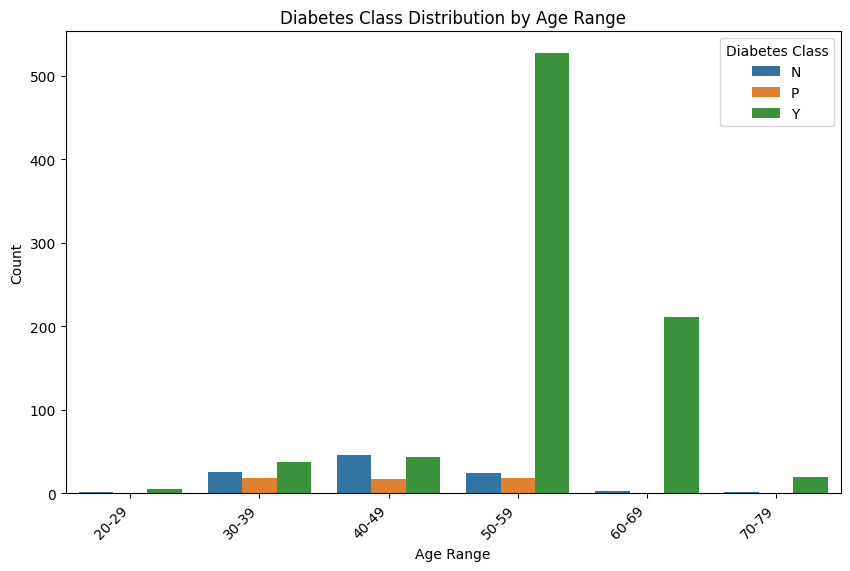

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', hue='CLASS', data=df)
plt.title('Diabetes Class Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Diabetes Class')
plt.show()

In [22]:
# Select only numeric columns for correlation calculation
#correlation_values = df.corr()
import numpy as np
correlation_values = df.select_dtypes(include=np.number).corr()

In [23]:
correlation_values

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


<Axes: >

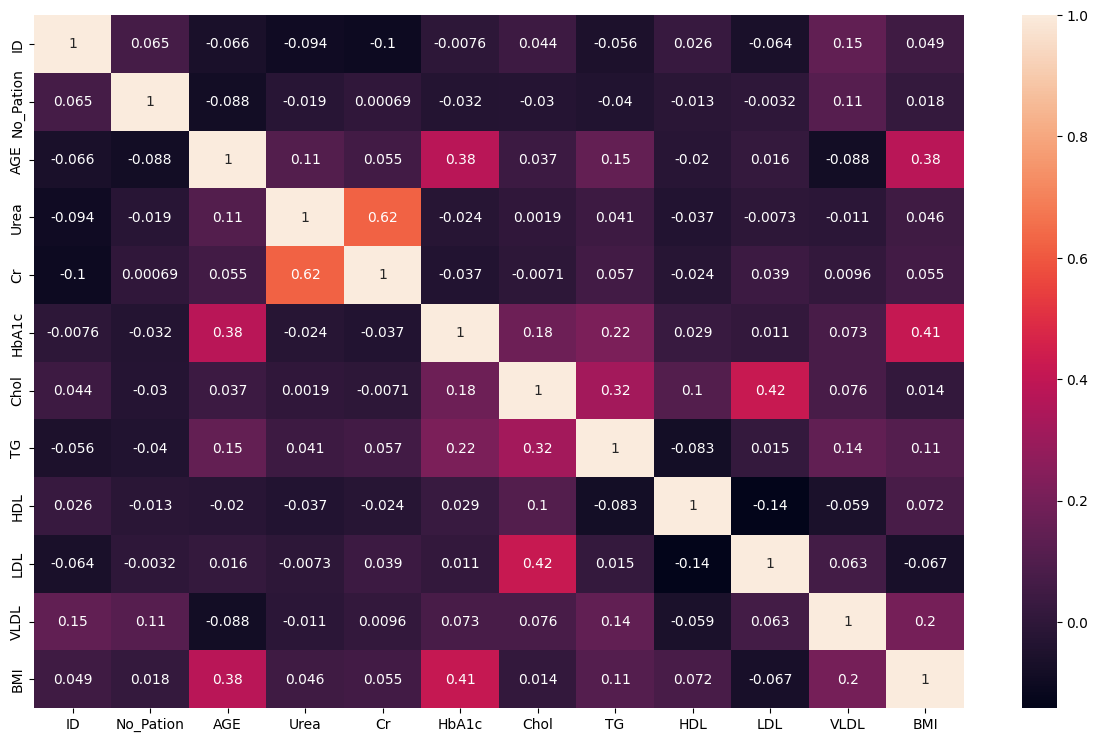

In [24]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot = True)

In [43]:
df2 = df.drop(['ID','No_Pation','AGE'], axis=1) # since we have age range
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,20-29
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,50-59
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,30-39


FEATURE SELECTION

In [44]:
#Feature Selection

df2 = df.drop(['ID','No_Pation','AGE'], axis=1) # since we have age range
df2.head()

#Feature Selection
X = df2.drop('CLASS', axis=1)
y = df2['CLASS']


In [45]:

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


In [47]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

# Fit and transform the 'age_range' column
X_train['age_range'] = le.fit_transform(X_train['age_range'])
X_test['age_range'] = le.transform(X_test['age_range'])

# Encode CLASS- y_train
# Fit and transform the target variable for the training set
y_train = le.fit_transform(y_train)

# Transform the target variable for the test set using the same encoder
y_test = le.transform(y_test)

In [48]:
X_train['Gender'].value_counts()

,count
Gender,
1,456
0,344


In [49]:
X_train['age_range'].value_counts()

,count
age_range,
3,458
4,170
2,87
1,66
5,14
0,5


In [50]:
X_train.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,age_range
29,0,4.3,49,4.0,5.6,1.4,1.4,3.6,0.6,22.0,2
535,1,2.7,38,8.8,4.8,1.3,1.7,1.6,2.0,26.0,3
695,1,2.9,35,11.5,4.9,2.1,2.3,1.8,0.8,33.0,4
557,1,3.2,49,6.7,4.6,1.2,1.3,2.8,0.5,30.2,3
836,0,5.9,74,12.4,5.5,1.3,1.6,1.7,1.9,27.0,3


In [51]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

# Fit and transform the 'age_range' column
X_train['age_range'] = le.fit_transform(X_train['age_range'])
X_test['age_range'] = le.transform(X_test['age_range'])

# Encode CLASS- y_train
# Fit and transform the target variable for the training set
y_train = le.fit_transform(y_train)

# Transform the target variable for the test set using the same encoder
y_test = le.transform(y_test)

In [52]:
X_train['Gender'].value_counts()

,count
Gender,
1,456
0,344


In [54]:
X_train['age_range'].value_counts()

,count
age_range,
3,458
4,170
2,87
1,66
5,14
0,5


In [55]:
X_train.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,age_range
29,0,4.3,49,4.0,5.6,1.4,1.4,3.6,0.6,22.0,2
535,1,2.7,38,8.8,4.8,1.3,1.7,1.6,2.0,26.0,3
695,1,2.9,35,11.5,4.9,2.1,2.3,1.8,0.8,33.0,4
557,1,3.2,49,6.7,4.6,1.2,1.3,2.8,0.5,30.2,3
836,0,5.9,74,12.4,5.5,1.3,1.6,1.7,1.9,27.0,3


In [57]:
# Import the necessary library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [58]:
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values = X_train[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
X_train_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
X_train_scaled.head()

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,-0.292455,-0.318516,-1.709188,0.584531,-0.663671,0.332179,0.915075,-0.348042,-1.518682
1,-0.911816,-0.494580,0.209620,-0.027163,-0.735150,0.807768,-0.922194,0.054194,-0.712560
2,-0.834395,-0.542598,1.288949,0.049299,-0.163313,1.758947,-0.738467,-0.290580,0.698155
3,-0.718265,-0.318516,-0.629859,-0.180087,-0.806630,0.173650,0.180167,-0.376773,0.133869
4,0.326906,0.081630,1.648726,0.508069,-0.735150,0.649239,-0.830331,0.025463,-0.511029


In [59]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [60]:
results = []
names = []

In [61]:
from sklearn.model_selection import KFold, cross_val_score # Import necessary classes




In [62]:
#cross validation
# Defining the number of folds for k-fold cross-validation
num_folds = 5

# Iterating through the models
for name, model in models:
  # Creating a KFold object
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

  # Performing cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

  # Storing the results
  results.append(cv_results)
  names.append(name)

  # Printing the mean and standard deviation of the accuracy scores
  print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

LR: 0.8425 (0.0187)
KNN: 0.8713 (0.0184)
NB: 0.9375 (0.0259)
SVC: 0.8387 (0.0183)
RFC: 0.9812 (0.0097)
DTR: 0.9750 (0.0056)
XGB: 0.9838 (0.0075)


In [63]:
# Since XGB is the best performing model based on the cross-validation results
best_model = XGBClassifier()

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_model.predict(X_test)

In [64]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [65]:
# Evaluate the performance of the best model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model on the test dataset: {accuracy:.4f}")

Accuracy of the best model on the test dataset: 0.9850


In [66]:
# Printing classification report and confusion matrix for more detailed evaluation.
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.98      0.96       200
weighted avg       0.99      0.98      0.99       200

Confusion Matrix:
[[ 20   0   1]
 [  0   6   0]
 [  1   1 171]]


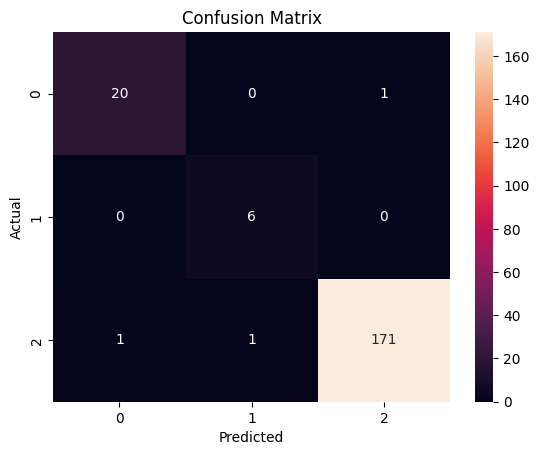

In [67]:
#Visualizing Predictions
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Question:**What insights did you derive from the EDA**

 The insights derived from the Exploratory Data Analysis (EDA) performed in the code:

Data Distribution:

Age: The age of the patients in the dataset has near-normal distribution, with a slight skew towards younger ages. Most of the patients are between 30-60.
Gender: There were more female patients compared to male in the dataset.
Class: Most of the data is for patients that are diabetic, followed by Non-diabetic, and pre-diabetic patients being the least represented.
Relationships:

Age and Class: There seems to be a slight increase in the prevalence of diabetes with age.

Age Range and Class: The 40-49 and 50-59 age ranges have the highest number of diabetic patients.

Correlation: Moderate correlation was observed among several numerical features like Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, and BMI.

Data Cleaning:
Spaces were removed from the 'CLASS' column to ensure consistency.
The 'Gender' column was converted to uppercase to maintain uniformity.

**Question:What Machine learning problems were solved?**

Problem: Classification

The code aims to build a model that can classify patients into one of three categories: Diabetic, Non-Diabetic, or Pre-Diabetic. This is a multi-class classification problem.

Approach:

Data Preprocessing: The data was preprocessed by encoding categorical features like 'Gender' and 'age_range' using Label Encoding. Numerical features were scaled using StandardScaler.

Model Selection: Several classification models were evaluated using cross-validation, including Logistic Regression, K-Nearest Neighbors, Gaussian Naive Bayes, Support Vector Classifier, Random Forest Classifier, Decision Tree Regressor, and XGBoost Classifier.

Model Evaluation: XGBoost performed the best and was selected as the final model. Its performance was evaluated using accuracy, classification report, and confusion matrix.